<a href="https://colab.research.google.com/github/attajunyah/GeoSpatialData/blob/main/GeoSpatial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with plotting in GeoPandas 
## Your First Map 
Learning about different methods to wrangle and visualize geospatial data, or data with a geographic location. 


In [ ]:
!pip install geopandas

In [2]:
import geopandas as gpd 

In [3]:
full_data = gpd.read_file("/content/drive/MyDrive/GeoSpatial/DEC_lands/DEC_lands.shp")

full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [4]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

## We use the value_counts() method to see a list of different land types, along with how many times they appear in the dataset. 

In [29]:
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [6]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


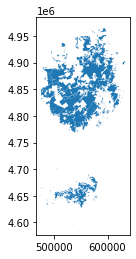

In [7]:
wild_lands.plot()

In [8]:
# /content/drive/MyDrive/GeoSpatial/DEC_pointsinterest/Decptsofinterest.shp

# Campsites in New York state (Point)
POI_data = gpd.read_file("/content/drive/MyDrive/GeoSpatial/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("/content/drive/MyDrive/GeoSpatial/DEC_roadtrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("/content/drive/MyDrive/GeoSpatial/NY_county_boundaries/NY_county_boundaries.shp")


## The **plot()** method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for **ax** ensures that all of the information is plotted on the same map.

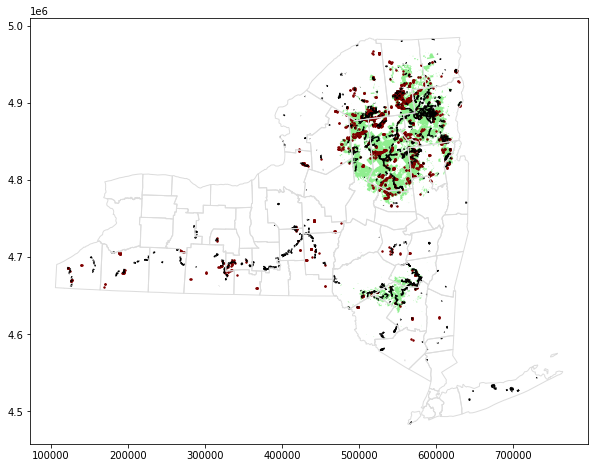

In [9]:
# Define a base map with county boundaries 
ax = counties.plot(figsize=(10,10), color="none", edgecolor="gainsboro", zorder=3)

# Add wild lands, campsites, and foot trails to the base map 
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

## Kiva Loans 

In [10]:
loans_filepath = "/content/drive/MyDrive/GeoSpatial/kiva_loans/kiva_loans.shp"

In [11]:
world_loans = gpd.read_file(loans_filepath)
world_loans.head() 

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [12]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


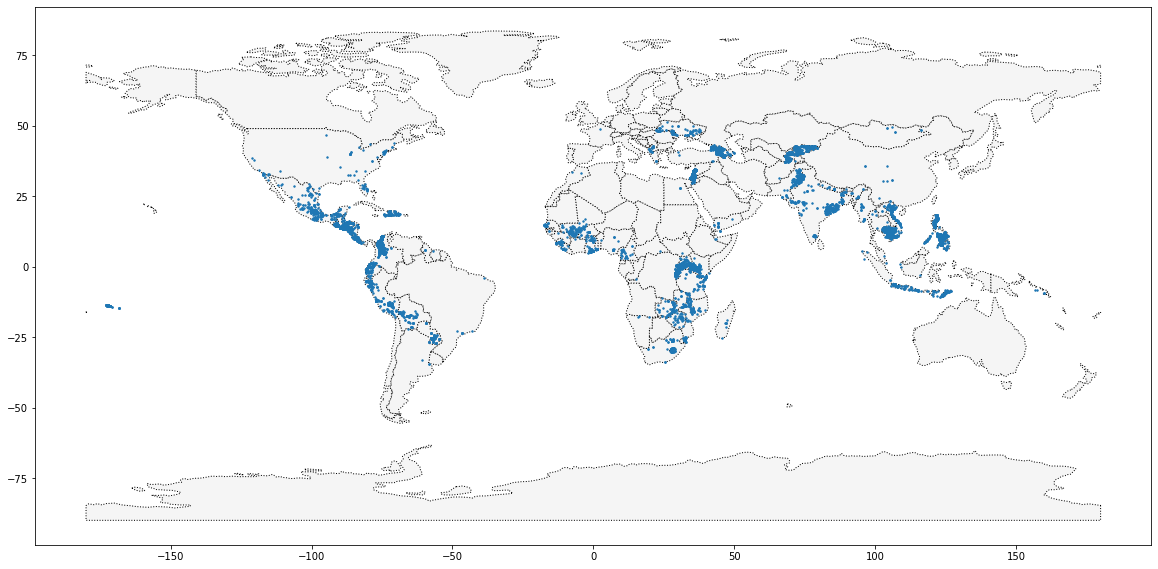

In [13]:
# Plot world as a base map 
ax = world.plot(figsize=(20,20), color="whitesmoke", linestyle=':', edgecolor="black")

# Add world_loans to the map 
world_loans.plot( ax=ax, markersize=2)

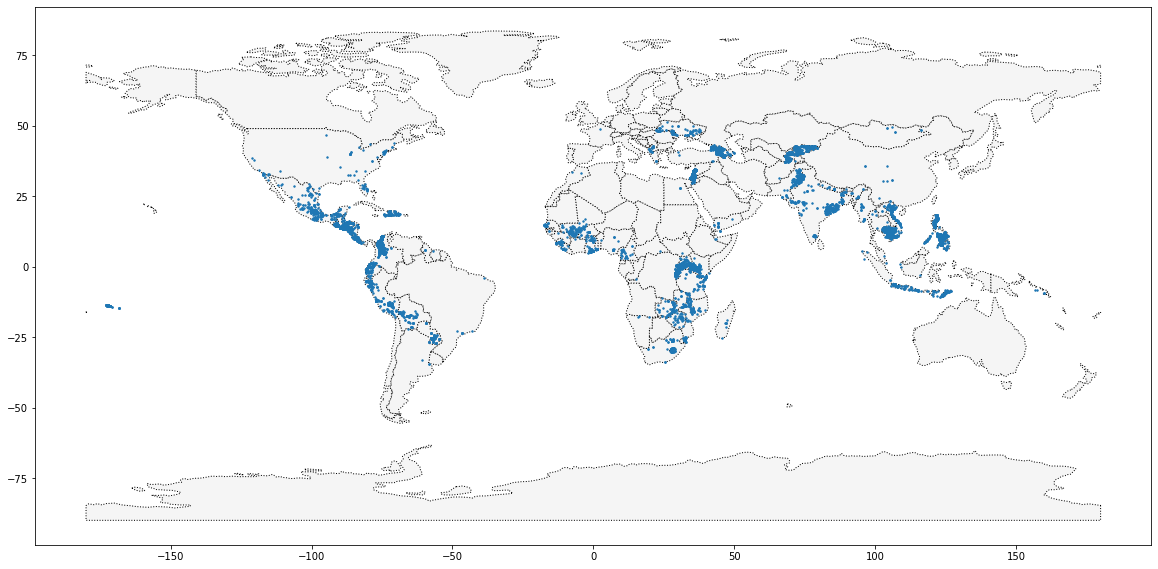

In [14]:
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)

In [15]:
PHL_loans = world_loans.loc[world_loans.country=='Phillipines'].copy()


In [16]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("/content/drive/MyDrive/GeoSpatial/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


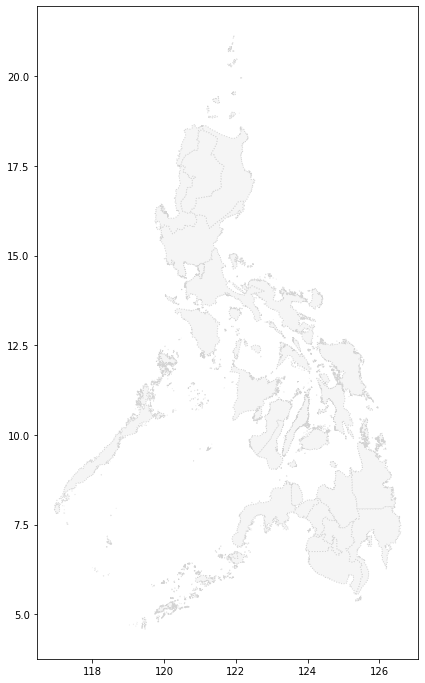

In [30]:
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax=ax, markersize=2)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


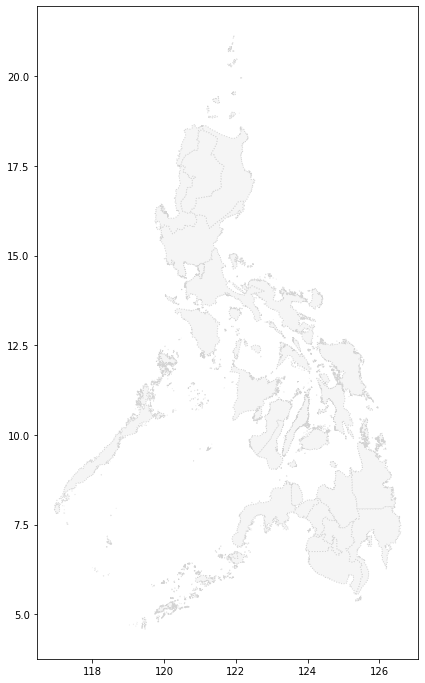

In [21]:
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(color="lightgreen", ax=ax, markersize=2)

# Setting the Coordinate Reference System (CRS) 
We use a CRS to show how the projected points correspond to real locations on Earth.

In [24]:
# import geopandas as gpd
import pandas as pd

In [25]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("/content/drive/MyDrive/GeoSpatial/Ghana/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

epsg:32630


* Creating a GeoDataFrame from a CSV file, we have to set the CRS. 
* EPSG 4326 corresponds to coordinates in latitude and longitude. 
* In the code cell above, to create a GeoDataFrame from a CSV file, we needed to use both Pandas and GeoPandas:

  * We begin by creating a DataFrame containing columns with latitude and longitude coordinates.
  * To convert it to a GeoDataFrame, we use gpd.GeoDataFrame().
  * The **gpd.points_from_xy()** function creates Point objects from the latitude and longitude columns.


In [26]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("/content/drive/MyDrive/GeoSpatial/Ghana/health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


* **Re-projecting**: refers to the process of changing the CRS by using `to_crs()` method.
* We **change** the **CRS** of the **facilities** GeoDataFrame to **match** the CRS of **regions** before plotting it.

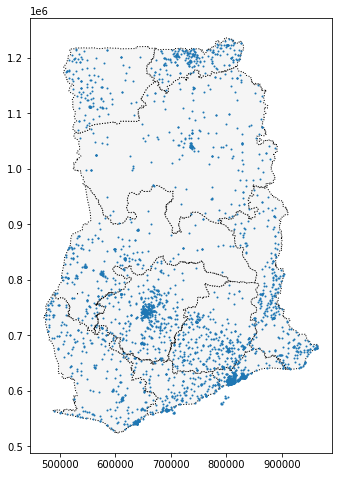

In [31]:
# Create a map 
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

* When EPSG code is not available, we change the CRS with **proj4 string** to convert to latitude/longitude coordinates. 

In [34]:
# Change the CRS to EPSG 4326 
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


**Attributes of geometric objects** 
* a Point 
* a LineString 
* a Polygon 

In [41]:
# Calculate the area (in m^2) of each polygon / calculate the biggest region 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6 

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions


Area of Ghana: 239584.5760055668 square kilometers
CRS: epsg:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
5,Northern,"POLYGON ((818287.468 1185632.455, 818268.664 1...",69830.576358
6,Upper East,"POLYGON ((811994.328 1230449.528, 812004.699 1...",8629.357677
7,Upper West,"POLYGON ((658854.315 1220818.656, 659057.210 1...",19022.080963
8,Volta,"POLYGON ((899718.788 875120.098, 899564.444 87...",20948.296066
9,Western,"POLYGON ((490349.315 771271.143, 490530.091 77...",24317.315180


Tutorial

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 13.1 MB/s 
     |████████████████████████████████| 16.7 MB 268 kB/s 
     |████████████████████████████████| 6.3 MB 39.7 MB/s 


In [43]:
import pandas as pd
import geopandas as gpd

In [44]:
birds_df = pd.read_csv("/content/drive/MyDrive/GeoSpatial/purple_martin.csv", 
                       parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [53]:
# Create the birds GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], 
                                                               birds_df["location-lat"]))
# Set the CRS to {'init': 'epsg:4326'}
birds.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


**Plot the data**

In [56]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world.continent.isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


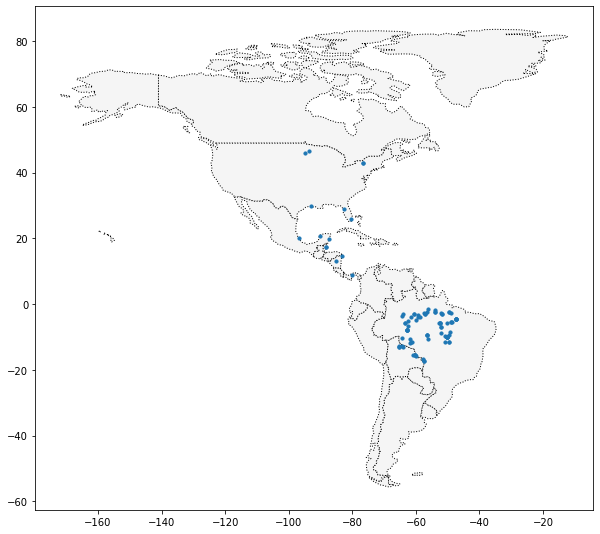

In [59]:
ax = americas.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
birds.plot(markersize=10, ax=ax)
# ax.set_xlim([-110, -30])
# ax.set_ylim([-30, 60])

In [62]:
from shapely.geometry import Point, LineString
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


In [63]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## Where does each bird start and end its journey?

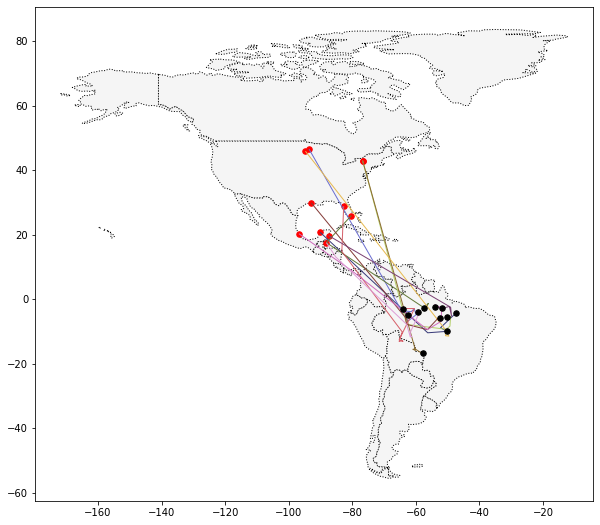

In [64]:
ax = americas.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)

## Where are the protected areas in South America?

In [65]:
# Load Protected Area shapefile 
protected_filepath = "/content/drive/MyDrive/GeoSpatial/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"

protected_areas = gpd.read_file(protected_filepath) 
protected_areas.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,"POLYGON ((-69.97523 12.47379, -69.97523 12.473..."
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"POLYGON ((-70.04734 12.56329, -70.04615 12.563..."
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"MULTIPOLYGON (((-69.96302 12.48384, -69.96295 ..."
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-68.59060 -14.43388, -68.59062 -14.4..."
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-69.20949 -14.73334, -69.20130 -14.7..."


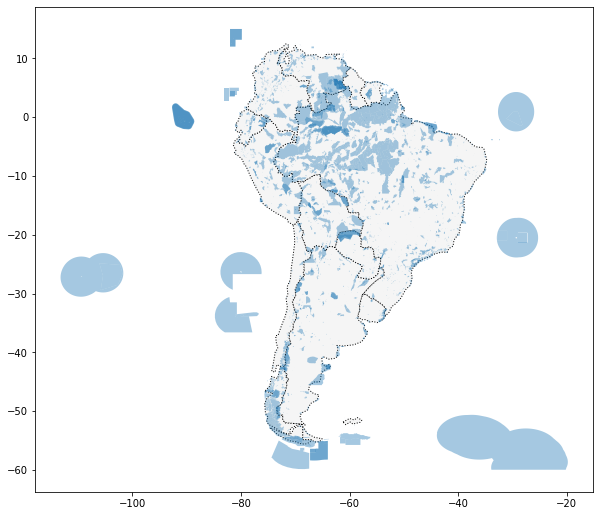

In [67]:
# Country boundaries in South America
south_america = americas.loc[americas['continent']=='South America']

# Your code here: plot protected areas in South America
ax = south_america.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
protected_areas.plot(ax=ax, alpha=0.4)

## What percentage of South America is protected? 
As a first step, you calculate the total area of all protected lands in South America (not including marine area). To do this, you use the "REP_AREA" and "REP_M_AREA" columns, which contain the total area and total marine area, respectively, in square kilometers.

In [69]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


In [71]:
# Calculate the total area of South America (in square kilometers)
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6 
totalArea

17759005.81506123

In [74]:
# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


## Where are the birds in South America?
Create a plot that shows for all birds, all of the locations where they were discovered in South America. Also plot the locations of all protected areas in South America.

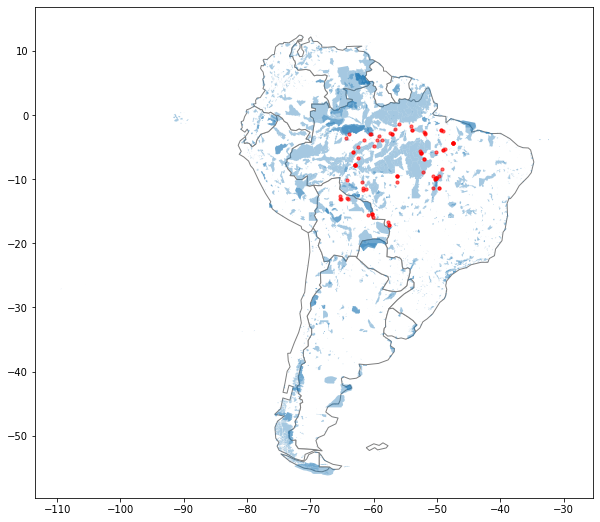

In [75]:
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)

# Interactive Maps

In [77]:
import pandas as pd
import geopandas as gpd 
import math 

In [78]:
import folium
from folium import Choropleth, Circle, Marker 
from folium.plugins import HeatMap, MarkerCluster 

## Your First Interactive Map 

In [103]:
# Create a map
map_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10) # default
map_2 = folium.Map(location=[42.32,-71.0589], tiles='cartodbdark_matter', zoom_start=10)
# map_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositronnolabels', zoom_start=10)
# map_4 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositrononlylabels', zoom_start=10)
map_5 = folium.Map(location=[42.32,-71.0589], tiles='stamenterrain', zoom_start=10) # nice
map_6 = folium.Map(location=[42.32,-71.0589], tiles='stamentoner', zoom_start=10) # Black & White nice
# map_7 = folium.Map(location=[42.32,-71.0589], tiles='stamentonerbackground', zoom_start=10)
# map_8 = folium.Map(location=[42.32,-71.0589], tiles='stamentonerlabels', zoom_start=10)
map_9 = folium.Map(location=[42.32,-71.0589], tiles='stamenwatercolor', zoom_start=10) # vague
map_10 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=10) # nice 

# Display the map 
map_1

## Load crime data 


In [107]:
## Load crime data 
crimes = pd.read_csv("/content/drive/MyDrive/GeoSpatial/crimes-in-boston/crime.csv", encoding='latin-1')

# Drop rows with missing locations 
crimes.dropna(subset=['Lat', 'Long', 'DISTRICT'], inplace=True)

# Focus on major crimes in 2018
crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin([
    'Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle', 'Residential Burglary',
    'Simple Assault', 'Harassment', 'Ballistics', 'Aggravated Assault', 'Other Burglary', 
    'Arson', 'Commercial Burglary', 'HOME INVASION', 'Homicide', 'Criminal Harassment', 
    'Manslaughter'])]
crimes = crimes[crimes.YEAR>=2018]

crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
19,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
24,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"


## Plotting points 
To reduce the amount of data we need to fit on the map, we'll (temporarily) confine our attention to daytime robberies.



In [108]:
daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & (crimes.HOUR.isin(range(9, 18))))]

### folium.Marker
We add markers to the map with `folium.Marker()`. Each marker below corresponds to a different robbery.



In [109]:
# Create a map 
map2 = folium.Map(location=[42.32, -71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map 
for idx, row in daytime_robberies.iterrows():
  Marker([row['Lat'], row['Long']]).add_to(map2)

# Display map 
map2

In [110]:
# Create the map
m_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in daytime_robberies.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'], row['Long']]))
m_3.add_child(mc)

# Display the map
m_3

### Bubble Maps 
We create a bubble map by using `folium.Circle()`. 

In [111]:
# Create a base map
m_4 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(daytime_robberies)):
    Circle(
        location=[daytime_robberies.iloc[i]['Lat'], daytime_robberies.iloc[i]['Long']],
        radius=20,
        color=color_producer(daytime_robberies.iloc[i]['HOUR'])).add_to(m_4)

# Display the map
m_4


### Heatmaps 
We use `folium.plugins.HeatMap()` to create a heatmap. 

In [120]:
# import sys

# sys.setrecursionlimit(1000)
# print(sys.getrecursionlimit())

In [128]:
# Create a base map
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
# HeatMap(data=crimes[['Lat', 'Long']], radius=10).add_to(m_5)

# Display the map
# m_5

### Choropleth Maps
Create using `folium.Choropleth()`

In [129]:
# GeoDataFrame with geographical boundaries of Boston police districts 
districts_full = gpd.read_file("/content/drive/MyDrive/GeoSpatial/Police_Districts/Police_Districts.shp")
districts = districts_full[["DISTRICT", "geometry"]].set_index("DISTRICT")
districts.head()

,geometry
DISTRICT,
A15,"MULTIPOLYGON (((-71.07416 42.39051, -71.07415 ..."
A7,"MULTIPOLYGON (((-70.99644 42.39557, -70.99644 ..."
A1,"POLYGON ((-71.05200 42.36884, -71.05169 42.368..."
C6,"POLYGON ((-71.04406 42.35403, -71.04412 42.353..."
D4,"POLYGON ((-71.07416 42.35724, -71.07359 42.357..."


We also create a Pandas Series called `plot_dict` that shows the number of crimes in each district 

In [130]:
# Number of crimes in each police district 
plot_dict = crimes.DISTRICT.value_counts() 
plot_dict.head()

D4     2885
B2     2231
A1     2130
C11    1899
B3     1421
Name: DISTRICT, dtype: int64

In [133]:
# Create a base map
m_6 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a choropleth map to the base map
Choropleth(geo_data=districts.__geo_interface__, 
           data=plot_dict, 
           key_on="feature.id", 
           fill_color='YlGnBu', # PuBu
           legend_name='Major criminal incidents (Jan-Aug 2018)'
          ).add_to(m_6)

# Display the map
m_6

## Tutorial

In [ ]:
!pip install geopandas

In [12]:
import pandas as pd 
import geopandas as gpd

import folium 
from folium import Choropleth
from folium.plugins import HeatMap

In [13]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

### Do earthquakes coincide with plate boundaries? 

In [14]:
plate_boundaries = gpd.read_file("/content/drive/MyDrive/GeoSpatial/Plate_Boundaries/Plate_Boundaries.shp")
plate_boundaries['coordinates'] = plate_boundaries.apply(lambda x: [(b,a) for (a,b) in list(x.geometry.coords)], axis='columns')
plate_boundaries.drop('geometry', axis=1, inplace=True)

plate_boundaries.head()

,HAZ_PLATES,HAZ_PLAT_1,HAZ_PLAT_2,Shape_Leng,coordinates
0,TRENCH,SERAM TROUGH (ACTIVE),6722,5.843467,"[(-5.444200361999947, 133.6808931800001), (-5...."
1,TRENCH,WETAR THRUST,6722,1.829013,"[(-7.760600482999962, 125.47879802900002), (-7..."
2,TRENCH,TRENCH WEST OF LUZON (MANILA TRENCH) NORTHERN ...,6621,6.743604,"[(19.817899819000047, 120.09999798800004), (19..."
3,TRENCH,BONIN TRENCH,9821,8.329381,"[(26.175899215000072, 143.20620700100005), (26..."
4,TRENCH,NEW GUINEA TRENCH,8001,11.998145,"[(0.41880004000006466, 132.8273013480001), (0...."


In [15]:
earthquakes = pd.read_csv("/content/drive/MyDrive/GeoSpatial/earthquakes1970-2014.csv", parse_dates=["DateTime"])
earthquakes.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,1970-01-04 17:00:40.200,24.139,102.503,31.0,7.5,Ms,90.0,NaN,NaN,0.0,NEI,1.970010e+09
1,1970-01-06 05:35:51.800,-9.628,151.458,8.0,6.2,Ms,85.0,NaN,NaN,0.0,NEI,1.970011e+09
2,1970-01-08 17:12:39.100,-34.741,178.568,179.0,6.1,Mb,59.0,NaN,NaN,0.0,NEI,1.970011e+09
3,1970-01-10 12:07:08.600,6.825,126.737,73.0,6.1,Mb,91.0,NaN,NaN,0.0,NEI,1.970011e+09
4,1970-01-16 08:05:39.000,60.280,-152.660,85.0,6.0,ML,0.0,NaN,NaN,NaN,AK,NaN


In [ ]:
# Create a base map with plate boundaries
m_1 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i], weight=2, color='black').add_to(m_1)

# Your code here: Add a heatmap to the map
HeatMap(data=earthquakes[['Latitude', 'Longitude']], radius=10).add_to(m_1)

# Show the map
embed_map(m_1, 'q_1.html')

### Is there a relationship between earthquake depth and proximity to a plate boundary in Japan? 